In [3]:
%load_ext autoreload
%autoreload 2

import notebook_path
import pickle

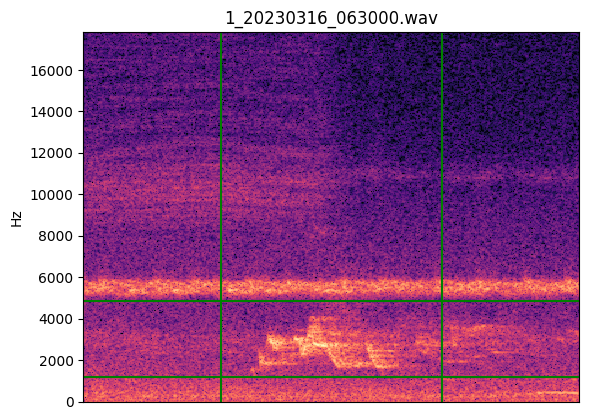

time segment:  (383.388842, 384.338452)
frequency range:  (1202.470337, 4831.221191)
source:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_000000.wav  | 0/200
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_050000.wav  | 1/200
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_053000.wav  | 2/200
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_060000.wav  | 3/200
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav  | 4/200
n# matches:  24
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_070000.wav  | 5/200
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_073000.wav  | 6/200
n# matches:  3
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data

In [7]:
from correlate import template_match

all_cors = template_match(n_files=200, peak_th=0.6) # default
file_path = './data/output/all_cors.pkl'

# Serialize and save the object
with open(file_path, 'wb') as f:
    pickle.dump(all_cors, f)

E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_073000.wav
90
0.6213530910653142


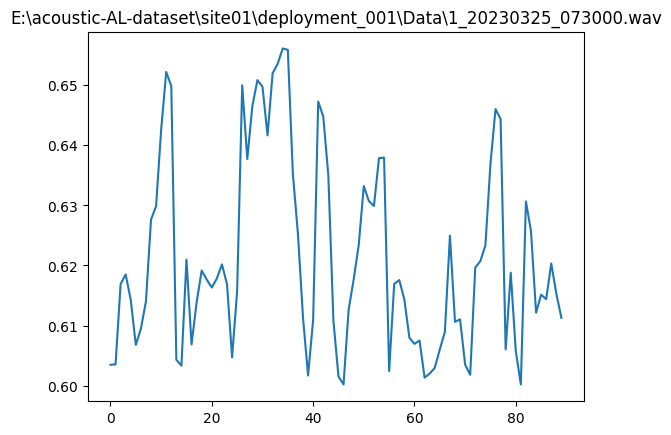

E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_120000.wav
2
0.6050735716247091


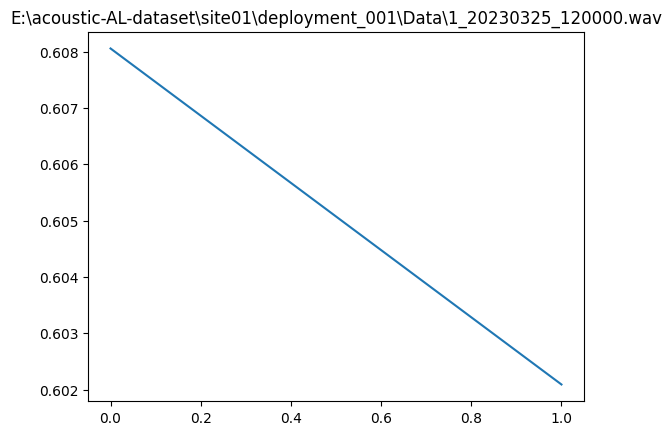

E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_163000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_170000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_173000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_180000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_183000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_190000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_193000.wav
0
nan
E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230325_200000.wav
0
nan


In [8]:
import matplotlib.pyplot as plt

for c in all_cors[150:160]:
    name, corr = c
    print(name)
    print(len(corr))
    print(corr["xcorrcoef"].mean())
    if len(corr) > 0:
        corr["xcorrcoef"].plot()
        plt.title(f"{name}")
        plt.show()
    

In [31]:
new_thresh = 0.65

with open("data/output/all_cors.pkl", "rb") as f:
    all_cors = pickle.load(f)

trimmed_corrs = []
for c in all_cors:
    name, corrs = c
    trimmed = corrs[corrs["xcorrcoef"] >= new_thresh]
    if len(trimmed) > 0:
        trimmed_corrs.append((name, trimmed))
        print(len(trimmed))  
        
print(f"remaining recodings: {len(trimmed_corrs)}/{len(all_cors)}")  


14
7
40
3
27
2
7
2
1
1
30
2
1
1
5
6
1
10
41
1
8
21
6
57
8
remaining recodings: 25/200


In [ ]:
import matplotlib.pyplot as plt
from plotting import view_spectrogram
import os
from os import path
from util import get_depl_dir
from datetime import datetime
import numpy
import librosa
from util import *

figsize = (4, 3)
y_lim = 7_000

image_folder = path.join("figures", "triangle" + datetime.now().strftime("%m.%d.%Y.%H.%M.%S"))
os.mkdir(image_folder)

for c in trimmed_corrs:
    name, matches_df = c
    if name == "E:\\acoustic-AL-dataset\\site01\\deployment_001\\Data\\1_20230316_063000.wav":
        continue
        
    print(f"{len(matches_df)} from: ", name)
    
    y, sr = load(name, sr=44_000)

    widen = 0.6

    for i, row in matches_df.iterrows():
        
        fig, ax = plt.subplots(figsize=figsize)
        
        frequency_range = (row["min_f"], row["max_f"])
        time_segment = (row["peak_time"] -  0.949 / 2, row["peak_time"] + 0.949 / 2)
        title = str(row["xcorrcoef"])[:5] + "_" + path.basename(name)
                      
        n_fft = 2048
        hop_length = n_fft // 4

        # cut out spectrogram 
        start, end = time_segment
        y_cut = y[max(int(sr * (start - widen)), 0) : int(sr * (end + widen))]
        S = librosa.stft(y_cut, n_fft=n_fft, hop_length=hop_length)
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        
        if frequency_range:
            ax.axhline(y=frequency_range[0], color="g", linestyle="-")
            ax.axhline(y=frequency_range[1], color="g", linestyle="-")
            
            if y_lim:
                ax.set_ylim(0, y_lim)
            else:
                ax.set_ylim(0, min(frequency_range[1] + 9_000, sr * 2))

        if time_segment:
            ax.axvline(x=int(widen * sr / hop_length), color="g", linestyle="-")
            ax.axvline(
                x=S.shape[1] - int(widen * sr / hop_length), color="g", linestyle="-"
            )

        img = librosa.display.specshow(S_db, y_axis="linear", ax=ax, sr=sr)
        ax.set(title=title)
        ax.set_xlabel(f"{start}-{end}")

        # plt.savefig(path.join(image_folder, path.basename(name) + str(i) + ".png"))
        plt.show()
        # display(Audio(data=y, rate=sr))

383.388842 384.338452


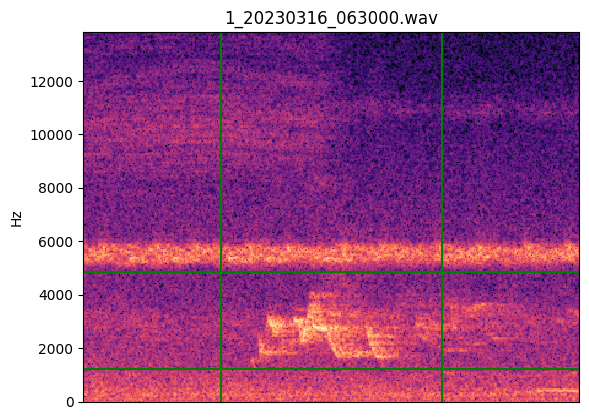

time segment:  (383.388842, 384.338452)
frequency range:  (1202.470337, 4831.221191)
source:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav


 == DEPLOYMENT 1 == 
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_000000.wav  | 0/150
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_050000.wav  | 1/150
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_053000.wav  | 2/150
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_060000.wav  | 3/150
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav  | 4/150
n# matches:  24
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_070000.wav  | 5/150
n# matches:  0
correlating:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_073000.wav  | 6/150
n# matches:  3
correlating:  E:\acoustic-AL-dataset\sit

In [21]:
from correlate import template_match

all_cors = template_match(template="data\\correlations\\triangle3khz\\template.txt",
                          n_deployments=7, peak_th=0.6, n_files=150)

file_path = 'data\\correlations\\triangle3khz\\all_deployments_7-8-2024.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(all_cors, f)

threshold using 504 / 8274
over 50 files found, only showing first 50 in correlations


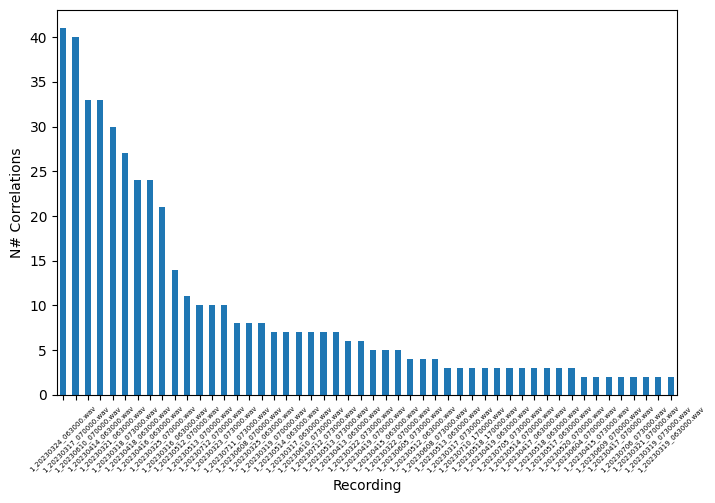

In [23]:
from util import *
from pathlib import Path
from datetime import datetime
from plotting import view_spectrogram, plot_correlations
import matplotlib.pyplot as plt
import pickle
import pygetwindow as gw
from IPython.display import Audio, display
# with open(correlations_pkl, "rb") as f:
    # correlations = pickle.load(f)

thresh = 0.65
correlations = all_cors

# trimm correlations to the threshhold
df = correlations[correlations["xcorrcoef"] >= thresh]
print(f"threshold using {len(df)} / {len(correlations)}")
counts = df["recording"].value_counts()
if len(counts) >= 50:
    print("over 50 files found, only showing first 50 in correlations")
    counts = counts[:50]

plt.figure(figsize=(8, 5))
counts.plot(kind="bar")
plt.xticks(fontsize=5, rotation=45)
plt.xlabel("Recording")
plt.ylabel("N# Correlations")
plt.show(block=False)


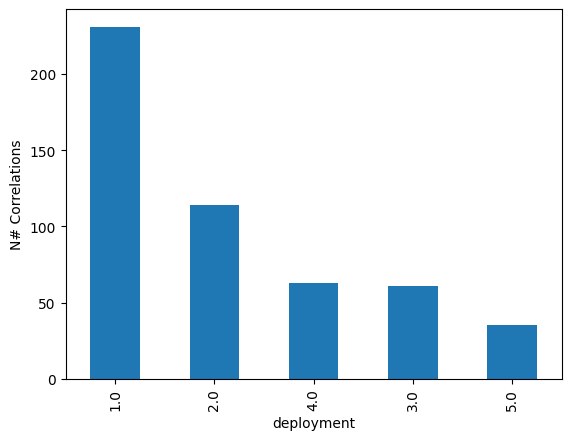

In [25]:
counts = df["deployment"].value_counts()
counts.plot(kind="bar")
plt.ylabel("N# Correlations")
plt.show()

In [36]:
import os
from util import *

all_files = []
hist = {}
for i in range(11):
    depl_files = os.listdir(path.join(get_depl_dir(i+1, 1), 'Data'))
    hist[f"deployement {i+1}"] = len(depl_files)
    print(len(depl_files))
    all_files += depl_files

# check that all recordings have unique id's
assert len(all_files) == len(set(all_files))

263
458
277
213
277
455
277
471
278
452
277


In [37]:
df

peak_time  xcorrcoef       min_t       max_t        min_f        max_f  \
3     273.637333   0.694163  273.162667  274.112000  1202.470337  4831.221191   
4     281.472000   0.657826  280.997333  281.946667  1202.470337  4831.221191   
5     292.746667   0.727091  292.272000  293.221333  1202.470337  4831.221191   
6     300.037333   0.681348  299.562667  300.512000  1202.470337  4831.221191   
7     313.989333   0.692338  313.514667  314.464000  1202.470337  4831.221191   
...          ...        ...         ...         ...          ...          ...   
7981  516.848000   0.671078  516.373333  517.322667  1202.470337  4831.221191   
7982  516.864000   0.656697  516.389333  517.338667  1202.470337  4831.221191   
7983  516.874667   0.651016  516.400000  517.349333  1202.470337  4831.221191   
8002  164.458667   0.655077  163.984000  164.933333  1202.470337  4831.221191   
8047  539.664000   0.661995  539.189333  540.138667  1202.470337  4831.221191   

                  recording  deployment  site  
3     1_20230316_063000.wav         1.0   1.0  
4     1_20230316_063000.wav         1.0   1.0  
5     1_20230316_063000.wav         1.0   1.0  
6     1_20230316_063000.wav         1.0   1.0  
7     1_20230316_063000.wav         1.0   1.0  
...                     ...         ...   ...  
7981  1_20230712_073000.wav         5.0   1.0  
7982  1_20230712_073000.wav         5.0   1.0  
7983  1_20230712_073000.wav         5.0   1.0  
8002  1_20230712_163000.wav         5.0   1.0  
8047  1_20230712_170000.wav         5.0   1.0  

[504 rows x 9 columns]

In [50]:

figsize = (4, 3)
y_lim = 7_000

image_folder = path.join(
    "untracked", "triangle3khz_150_5deployments" + datetime.now().strftime("%m.%d.%Y.%H.%M.%S")
)
os.mkdir(image_folder)

# grouped by recording, iterate over all correlations
for recording, matches_df in df.groupby("recording"):

    deployment = matches_df["deployment"].iloc[0]
    site = matches_df["site"].iloc[0]
    
    if deployment == 1:
        continue # already seen
    
    # TODO different deployments
    name = path.join(get_depl_dir(deployment, site), "Data", recording)

    print(f"{len(matches_df)} from: ", name)
    y, sr = load(name, sr=44_000)
    widen = 0.6

    for i, row in matches_df.iterrows():

        fig, ax = plt.subplots(figsize=figsize)

        frequency_range = (row["min_f"], row["max_f"])
        time_segment = (row["peak_time"] - 0.949 / 2, row["peak_time"] + 0.949 / 2)
        title = str(row["xcorrcoef"])[:5] + "_" + path.basename(name)

        n_fft = 2048
        hop_length = n_fft // 4

        # cut out spectrogram
        start, end = time_segment
        y_cut = y[max(int(sr * (start - widen)), 0) : int(sr * (end + widen))]
        S = librosa.stft(y_cut, n_fft=n_fft, hop_length=hop_length)
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

        if frequency_range:
            ax.axhline(y=frequency_range[0], color="g", linestyle="-")
            ax.axhline(y=frequency_range[1], color="g", linestyle="-")

            if y_lim:
                ax.set_ylim(0, y_lim)
            else:
                ax.set_ylim(0, min(frequency_range[1] + 9_000, sr * 2))

        if time_segment:
            ax.axvline(x=int(widen * sr / hop_length), color="g", linestyle="-")
            ax.axvline(
                x=S.shape[1] - int(widen * sr / hop_length),
                color="g",
                linestyle="-",
            )

        img = librosa.display.specshow(S_db, y_axis="linear", ax=ax, sr=sr)
        ax.set(title=title)
        ax.set_xlabel(f"{start}-{end}")
        ax.set_ylabel(f"deployment={deployment}")

        # save figs
        plt.savefig(path.join(image_folder, f"{path.basename(name)}-d={deployment}-i={i}.png"))

        # display(Audio(data=y_cut, rate=sr))
        # plt.show(block=False)

        plt.clf()
        plt.close()

6 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230413_063000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230413_170000.wav
33 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230414_063000.wav
5 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230415_063000.wav
2 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230415_073000.wav
24 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230416_063000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230416_070000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230416_073000.wav
3 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230417_063000.wav
2 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230417_070000.wav
24 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230418_063000.wav
3 from:  E:\acoustic-AL-dataset\site01\deployment_002\Data\1_20230419_063000.wav
5 from:  E:\acoustic-AL-d

In [52]:
len(os.listdir("untracked\\triangle3khz_150_5deployments07.09.2024.20.42.57"))

273

In [53]:
len(df)

504

In [10]:
from correlate import Template

template = Template(
    frequency_lims=(1202.470337, 4831.221191),
    time_segment=(383.388842, 384.338452),
    source_recording_path='E:\\acoustic-AL-dataset\\site01\\deployment_001\Data\\1_20230316_063000.wav',
    name='triangle_3khz'
)

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\taznk\AppData\Local\Temp\ipykernel_23856\169756862.py:6: SyntaxWarning: invalid escape sequence '\D'
  source_recording_path='E:\\acoustic-AL-dataset\\site01\\deployment_001\Data\\1_20230316_063000.wav',


In [16]:
corrs = template.load_raw_correlations(custom_path='data\\correlations\\triangle3khz\\all_deployments_7-8-2024.pkl')

threshold using 504 / 8274
over 50 files found, only showing first 50 in correlations


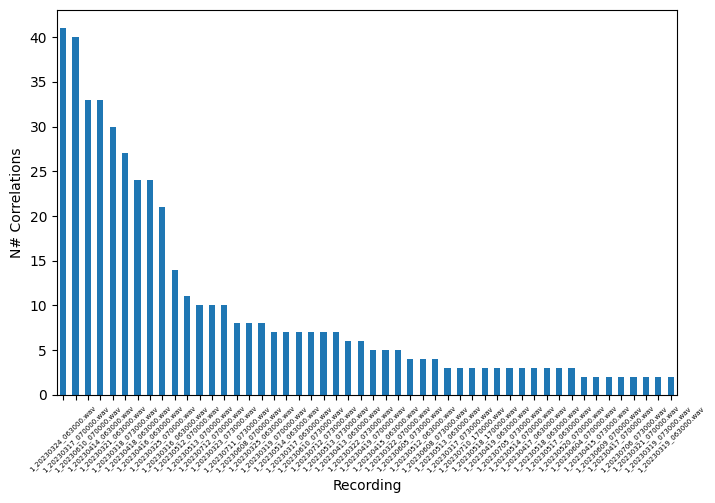

14 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav


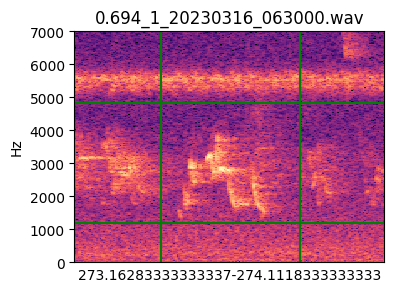

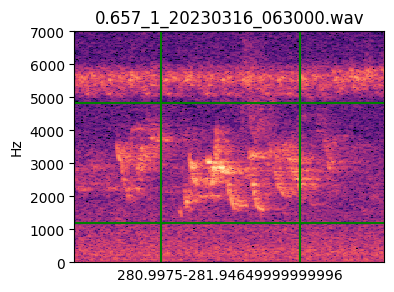

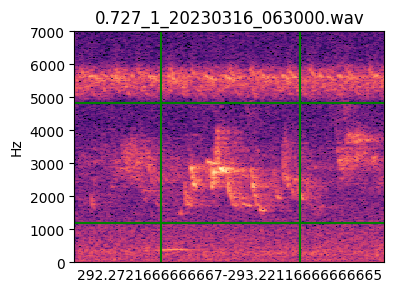

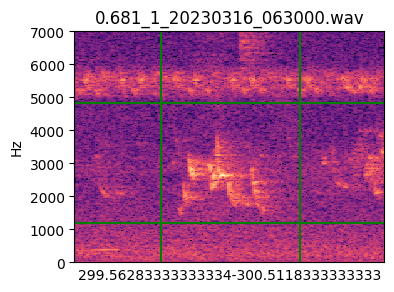

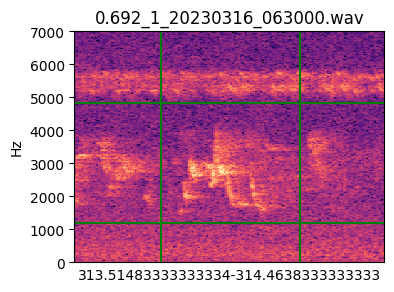

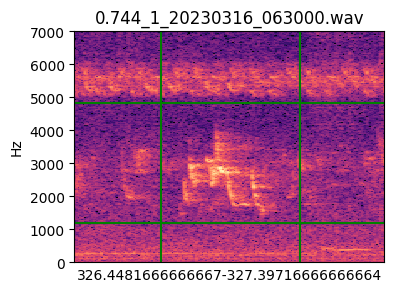

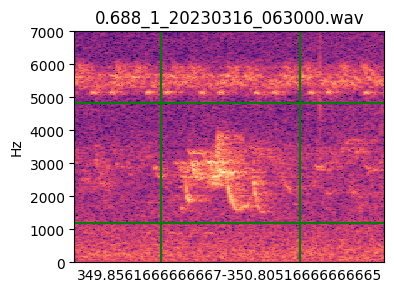

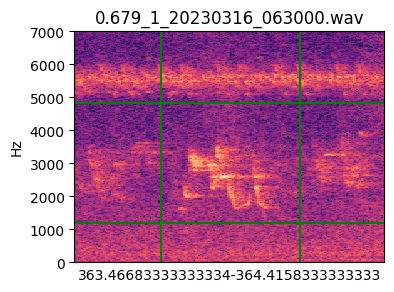

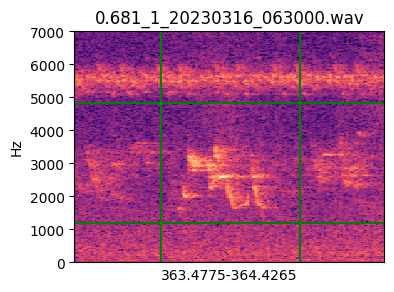

KeyboardInterrupt: Interrupted by user

In [21]:
template.verify_correlations(output_csv="untracked/test.csv")